In [4]:
# Changing Working Directory
import os
os.chdir('..//..')
os.getcwd()

'd:\\Project A\\neural_cstg'

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as spio
import networkx as nx
import os
import time
from IPython.display import clear_output
from GaligoolAngel.utils import vector_to_symmetric_matrix

In [6]:
# Load Data
# Mbe Needs to Change Path Before
path_to_data = '..\\data\\inputs'
results_analysis_path = 'analysis_importance.mat' # Insert Path
matlab_data_path = 'graph_analysis_inputs.mat' # Insert Path 
data_analysis = spio.loadmat(os.path.join(path_to_data, results_analysis_path))
raw_data = spio.loadmat(os.path.join(path_to_data, matlab_data_path))

cc = raw_data["CC"]
cc_feats = raw_data["CC_features"]
imp_feats = data_analysis["important_mus_order"]
train_stage = raw_data["train_stage"]
train_nums = raw_data["training_lut"]



In [7]:
# Rearrange CC
order_feats = range(cc_feats.shape[0])
imp_order = []
not_imp_order = []
for ind in order_feats:
    if ind in imp_feats:
        imp_order.append(ind)
    else:
        not_imp_order.append(ind)

new_order = np.concatenate([np.array(imp_order), np.array(not_imp_order)])
cc_feats_new = cc_feats[new_order, :]

print(cc_feats_new.shape[0])
for trial in range(cc_feats_new.shape[-1]):
    cc[:, :, trial] = vector_to_symmetric_matrix(cc_feats_new[:, trial])

9453


In [19]:
# Calculate EigenValues of CC's
eigs = np.zeros((len(train_nums), cc.shape[0]))
train_stage = train_stage.flatten()
train_nums = train_nums.flatten()
for session in range(len(train_nums)):
    train = np.where(train_stage == session + 1)
    current_eigs, _ = np.linalg.eig(np.transpose(cc[:, :, train].squeeze(), (2, 0, 1)))
    eigs[session, :] = np.mean(current_eigs, axis=0)
    # eigs[session, :] = eigs[session, :] / len(train)


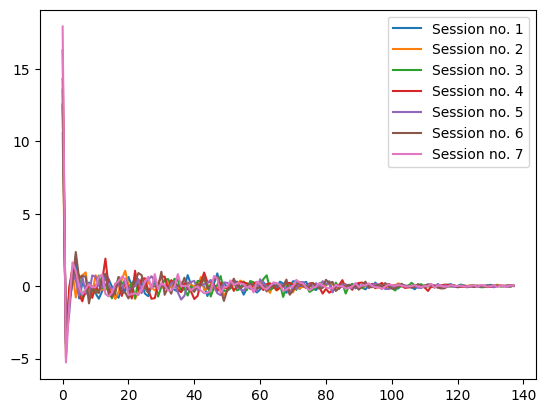

In [21]:
# Plotting EigenValues Results
plt.figure()
for session in range(eigs.shape[0]):
    plt.plot(eigs[session, :], label=f'Session no. {session + 1}')
plt.legend()

In [ ]:
# Plotting EigenValues Results


In [5]:
# Building Graphs
g_cc = []
for trial_i in range(cc.shape[-1]): 
    g_cc.append(nx.from_numpy_array(np.exp(-cc[:, :, trial_i])))
    



In [9]:
### Simple Analysis
## Using Degree Centrality
degs = []
for g in g_cc:
    degs.append(nx.degree_centrality(g))

## Transform to matrix
# Determine the matrix size
num_graphs = len(degs)
max_nodes = max(max(d.keys()) for d in degs) + 1  # +1 because node indices start at 0

# Initialize the matrix with zeros
centrality_matrix = np.zeros((num_graphs, max_nodes))

# Fill the matrix
for i, graph_centrality in enumerate(degs):
    for node, centrality in graph_centrality.items():
        centrality_matrix[i, node] = centrality



Text(0, 0.5, 'Trial [#]')

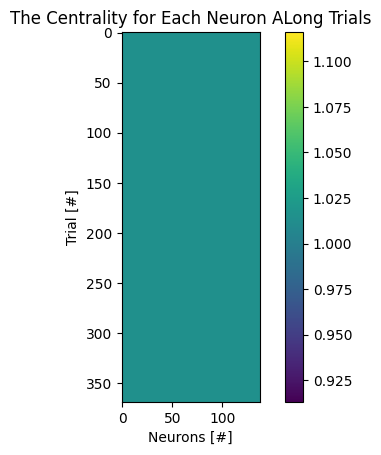

In [10]:
# Plot Results
plt.figure()
plt.imshow(centrality_matrix)
plt.colorbar()
plt.title("The Centrality for Each Neuron ALong Trials")
plt.xlabel("Neurons [#]")
plt.ylabel("Trial [#]")